# Arthur Marquand  
## Return Insights 

---

### Project Objective:
Calculate the expected return of certain financial assets using multiple methods:  
1) Arithmetic Mean  
2) Geometric Mean  
3) Capital Asset Pricing Model (CAPM)

We will also calculate the volatility and Sharpe Ratio to assess the risk and risk-adjusted performance of each asset.

---

### Step 1: Data Import
Import mothly prices (from 1994 to today) of selected assets from Yahoo Finance.
Examples of assets: Apple, Coca-Cola, and Starbucks stocks, SPY, CAC 40, SMI, Nasdaq, etc.

**Note**: We need to use the adjusted price, which accounts for dividends, to calculate the Total Return Index. Data is imported starting from 1994 to ensure availability for all selected assets on Yahoo Finance. If you add new assets, you may need to adjust the starting date, as data may not be available back to 1994 for all assets.

In [1]:
import yfinance as yf  # Import the yfinance library for downloading financial data
import pandas as pd  # Import pandas for data manipulation
from datetime import datetime  # Import datetime to handle date functions
import importlib  # Import importlib for reloading modules
import utils  # Import a custom module named utils
importlib.reload(utils)  # Reload the utils module to ensure it's updated

# List of asset symbols to download historical data for.
# Includes symbols for SPY (S&P 500 ETF), Apple (AAPL), Coca-Cola (KO), 
# Starbucks (SBUX), CAC40 (^FCHI), Swiss Market Index (^SSMI), NASDAQ (^IXIC), 
# Microsoft (MSFT), Johnson & Johnson (JNJ), Procter & Gamble (PG), ExxonMobil (XOM).
assets = ['SPY', 'AAPL', 'KO', 'SBUX', '^FCHI', '^SSMI', '^IXIC', 'MSFT', 'JNJ', 'PG', 'XOM']  

# Get the current date to define the date range for historical data
today = datetime.today()

# Define the start date as today's date but replace the year with 1994, converting it to the correct format for the API ('YYYY-MM-DD')
start_date = today.replace(year=1994).strftime('%Y-%m-%d')
# Define the end date as today's date in the correct format ('YYYY-MM-DD')
end_date = today.strftime('%Y-%m-%d')

# Download monthly adjusted closing prices for each asset within the defined date range
monthly_price_data = yf.download(assets, interval="1mo", start=start_date, end=end_date)['Adj Close']

# Print a success message to confirm that data for all assets was imported
print("Monthly prices for all selected assets have been successfully imported.")


[*********************100%***********************]  11 of 11 completed

Monthly prices for all selected assets have been successfully imported.


---

### Step 2: Total Return Index (TRI) Calculation
For each asset:
- Calculate the monthly logarithmic returns to account for continuous price variations. 
- Sum the monthly returns to obtain the annual logarithmic return.
- Convert this annual logarithmic return to a simple annual return for easier interpretation.

**Note:** Logarithmic returns are preferred for their ability to add continuously, making calculations more accurate for time series data.



In [2]:
from utils import TotalReturnIndexCalculator  # Import the TotalReturnIndexCalculator class from the utils module

# Initialize an instance of the TotalReturnIndexCalculator class
totalreturnindexcalculator = TotalReturnIndexCalculator()

# Initialize a dictionary to store the annual returns for each asset
annual_returns_dict = {}

# Calculate the annual returns for each asset using monthly price data
for asset in assets:
    # Calculate annual simple returns for the current asset and store them in the dictionary
    annual_returns_dict[asset] = totalreturnindexcalculator.annual_simple_returns(monthly_price_data[asset])

# Print a confirmation message to indicate successful calculation
print("Annual returns for all assets have been successfully calculated and stored.")

Annual returns for all assets have been successfully calculated and stored.


---

### Step 3: Calculation of Mean and Volatility
- Calculate the mean of the annual returns to obtain an overall measure of the historical return for each asset.
- Calculate the volatility (standard deviation) of the annual returns to measure the risk associated with each asset.
- Calculate the Sharpe Ratio to assess risk-adjusted return:
  Sharpe Ratio = (Expected Return - Risk-Free Rate) / Volatility

**Note:** To estimate the risk-free rate, we will import the yield of a T-Bill (Treasury Bill) and annualize it to obtain the risk-free rate.

In [3]:
from utils import Calculator  # Import the Calculator class from the utils module

# Initialize an instance of the Calculator class
calculator = Calculator()

# Download the latest 3-month T-Bill rate for a 1-day period
t_bill = yf.download("^IRX", period="1d")['Close']

# Use the most recent value directly, dividing by 100 to convert it from a percentage to a decimal
rf = t_bill.iloc[0] / 100  # Risk-free rate as a decimal

# Initialize dictionaries to store calculated metrics for each asset
mean_dict = {}  # Dictionary for arithmetic mean of returns
standard_deviation_dict = {}  # Dictionary for standard deviation of returns
sharpe_ratio_dict = {}  # Dictionary for Sharpe Ratio of returns

# Calculate metrics for each asset and store in corresponding dictionaries
for asset in assets:
    mean_dict[asset] = calculator.mean(annual_returns_dict[asset])  # Arithmetic mean of annual returns
    standard_deviation_dict[asset] = calculator.standard_deviation(annual_returns_dict[asset])  # Standard deviation of annual returns
    sharpe_ratio_dict[asset] = calculator.sharpe_ratio(annual_returns_dict[asset], rf)  # Sharpe Ratio using the risk-free rate

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Arithmetic Mean": list(mean_dict.values()),  # Arithmetic mean of returns for each asset
    "Standard Deviation": list(standard_deviation_dict.values()),  # Standard deviation of returns for each asset
    "Risk Free Rate": (rf),  # Risk-free rate, applied to the entire table
    "Sharpe Ratio": list(sharpe_ratio_dict.values())  # Sharpe Ratio for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

[*********************100%***********************]  1 of 1 completed

    Asset  Arithmetic Mean  Standard Deviation  Risk Free Rate  Sharpe Ratio
0     SPY         0.125327            0.180964         0.04408      0.448969
1    AAPL         0.430285            0.713668         0.04408      0.541154
2      KO         0.092863            0.165733         0.04408      0.294347
3    SBUX         0.244302            0.389909         0.04408      0.513510
4   ^FCHI         0.066708            0.199370         0.04408      0.113498
5   ^SSMI         0.067706            0.186576         0.04408      0.126631
6   ^IXIC         0.152114            0.283753         0.04408      0.380733
7    MSFT         0.255597            0.376700         0.04408      0.561500
8     JNJ         0.119163            0.146005         0.04408      0.514249
9      PG         0.121372            0.155244         0.04408      0.497871
10    XOM         0.130030            0.240196         0.04408      0.357831


---

### Step 4: Geometric Mean Calculation
Calculate the geometric mean from the annual returns to reflect the average return while accounting for the compounding effect over multiple periods.

**Note:** We use logarithmic returns for this calculation, as described in step 2, because they provide more accuracy when dealing with continuous price changes.

In [4]:
geometric_mean_dict = {}  # Dictionary for geometric mean of returns
for asset in assets:
    geometric_mean_dict[asset] = calculator.geometric_mean(annual_returns_dict[asset])  # Geometric mean of annual returns

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Geometric Mean": list(geometric_mean_dict.values()),  # Geometric mean of returns for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

    Asset  Geometric Mean
0     SPY        0.108652
1    AAPL        0.248815
2      KO        0.080144
3    SBUX        0.182402
4   ^FCHI        0.046132
5   ^SSMI        0.050847
6   ^IXIC        0.113249
7    MSFT        0.188205
8     JNJ        0.110235
9      PG        0.110311
10    XOM        0.105435


---

### Step 5: Estimation of Beta and Expected Return (CAPM)

- Calculate the excess returns by subtracting the risk-free rate from the asset's annual returns.
- Perform a linear regression of the asset's excess returns on the excess returns of the market index (in our case, the SPY) to estimate the beta (slope) and the alpha (intercept). 
- Conduct two statistical t-tests to determine:
    - If beta (slope) is significantly different from zero (H0: beta = 0).
    - If alpha (intercept) is significantly different from zero (H0: alpha = 0).
- Calculate the expected return using the CAPM: Expected Return (CAPM) = Risk-Free Rate + beta * (Market Return - Risk-Free Rate).
- Present the betas, the p-values of the betas, and the CAPM Expected Returns in a table. (The alphas will be used later to compute the alpha adjusted expected returns.)
- Draw the Security Market Line (SML) using the equation: Expected Return = beta * (Market Return - Risk-Free Rate) + Risk-Free Rate.
- Represent each asset as a red point on the graph, where the x-axis is the beta, and the y-axis is the expected return.

**Note:** We can analyze the beta t-test results in the table:
- If p-value < 5%, we can reject H0 (the hypothesis that beta = 0) at a 5% significance level.
- If p-value > 5%, we cannot reject H0 at a 5% significance level.

    Asset      Beta  P-Value Beta  CAPM Expected Return
0     SPY  1.000000  0.000000e+00              0.125327
1    AAPL  1.353407  6.336090e-02              0.154041
2      KO  0.515708  1.196413e-03              0.085980
3    SBUX  0.886040  2.397025e-02              0.116068
4   ^FCHI  0.830532  1.511392e-06              0.111558
5   ^SSMI  0.821922  1.343599e-07              0.110859
6   ^IXIC  1.344921  1.398570e-09              0.153351
7    MSFT  1.449717  1.916158e-05              0.161865
8     JNJ  0.438771  1.894747e-03              0.079729
9      PG  0.601615  1.581741e-05              0.092960
10    XOM  0.222970  3.749031e-01              0.062196


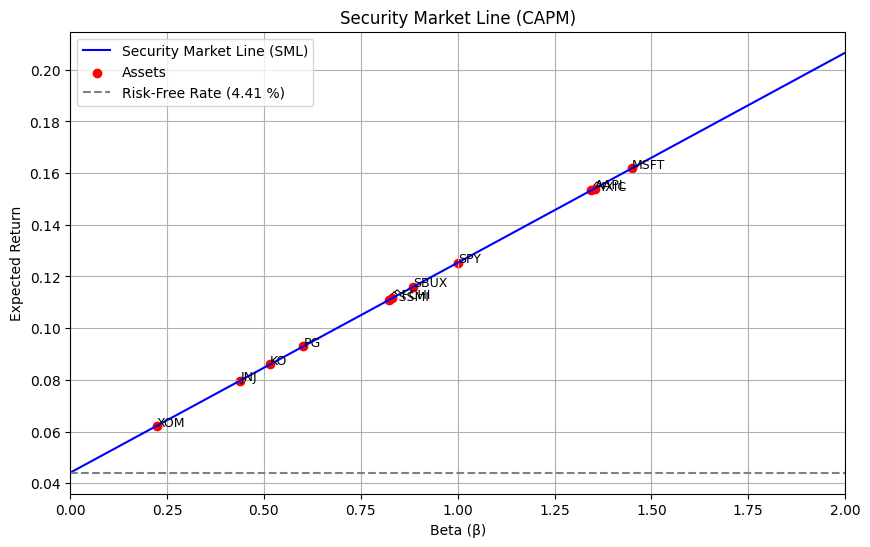

In [5]:
from utils import Capm  # Import the Capm class from the 'utils' module.

# Initialize an instance of the Capm class
capm = Capm()  # Create an object of the Capm class to access its methods.

# Initialize a dictionary to store CAPM metrics for each asset
capm_dict = {}  # This dictionary will hold CAPM metrics for all assets.

# Calculate CAPM metrics for each asset in comparison to the SPY (used as the market benchmark)
for asset in assets:  
    # For each asset in the list of assets:
    # - Perform CAPM regression using:
    #   1. The asset's annual returns (`annual_returns_dict[asset]`),
    #   2. The market benchmark's annual returns (`annual_returns_dict['SPY']`),
    #   3. The risk-free rate (`rf`).
    capm_dict[asset] = capm.regression(annual_returns_dict[asset], annual_returns_dict['SPY'], rf)

# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Create a pandas DataFrame from the CAPM dictionary.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys of the dictionary).
    "Beta": [v['beta'] for v in capm_dict.values()],  # Extract the beta coefficient for each asset.
    "P-Value Beta": [v['p_beta'] for v in capm_dict.values()],  # Extract the p-value of beta.
    "CAPM Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  # Extract the expected return.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame containing the CAPM results for all assets.

mean_market_return = mean_dict['SPY']  
# Approximate the mean market return using the average return of the SPY (benchmark).

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate.
    mean_market_return,  # Mean market return (SPY in this case).
    [v['beta'] for v in capm_dict.values()],  # List of beta values for all assets.
    [v['capm_expected_return'] for v in capm_dict.values()],  # List of expected returns for all assets.
    list(capm_dict.keys())  # List of asset names for labeling the plot.
)

---

### Step 6: Estimation of Alpha Adjusted Expected Return

- Calculate the Alpha-Adjusted Expected Return using the formula: Alpha Adjusted Expected Return = CAPM Expected Return + alpha
- Present the CAPM Expected Returns, the alphas, the p-values of the alphas, and the Alpha Adjusted Expected Returns in a table.
- Draw the Security Market Line (SML) using the equation: Expected Return = beta * (Market Return - Risk-Free Rate) + Risk-Free Rate 
- Represent each asset as a red point on the graph, where the x-axis is the beta, and the y-axis is the expected return.

**Note:** This time, the assets are not on the Security Market Line because we adjust the expected returns for alpha (the intercept). The only asset on the line is the SPY, as it represents our market index. 
We can also test if alpha is statistically significant by examining the p-values of the alpha:
- If p-value < 5%, we can reject H0 (the hypothesis that alpha = 0) at a 5% significance level.
- If p-value > 5%, we cannot reject H0 at a 5% significance level.

    Asset  Capm Expected Return         Alpha  P-Value Alpha  \
0     SPY              0.125327 -2.602085e-17  -2.602085e-17   
1    AAPL              0.154041  2.762440e-01   2.762440e-01   
2      KO              0.085980  6.882966e-03   6.882966e-03   
3    SBUX              0.116068  1.282341e-01   1.282341e-01   
4   ^FCHI              0.111558 -4.485026e-02  -4.485026e-02   
5   ^SSMI              0.110859 -4.315260e-02  -4.315260e-02   
6   ^IXIC              0.153351 -1.236653e-03  -1.236653e-03   
7    MSFT              0.161865  9.373183e-02   9.373183e-02   
8     JNJ              0.079729  3.943392e-02   3.943392e-02   
9      PG              0.092960  2.841202e-02   2.841202e-02   
10    XOM              0.062196  6.783389e-02   6.783389e-02   

    Alpha Adjusted Expected Return  
0                         0.125327  
1                         0.430285  
2                         0.092863  
3                         0.244302  
4                         0.066708  
5        

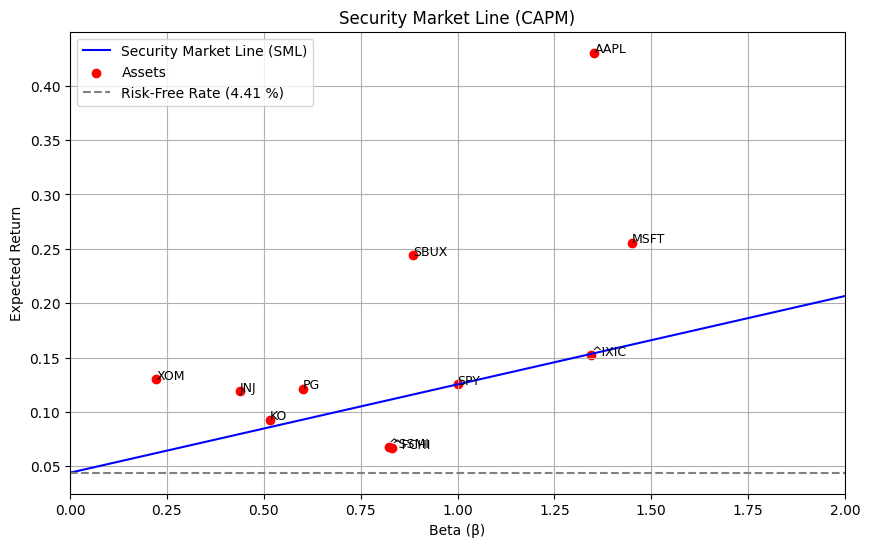

In [6]:
# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Initialize a pandas DataFrame with columns based on the CAPM results.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys from the CAPM dictionary).
    "Capm Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  
    # Add a column for the expected return of each asset based on the CAPM formula.
    "Alpha": [v['alpha'] for v in capm_dict.values()],  
    # Add a column for alpha values (excess return not explained by the market).
    "P-Value Alpha": [v['p_alpha'] for v in capm_dict.values()],
    # Add a column for p-values of alpha (statistical significance of alpha).
    "Alpha Adjusted Expected Return": [v['alpha_adjusted_expected_return'] for v in capm_dict.values()]
    # Add a column for the adjusted expected return that includes both CAPM expected return and alpha.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame to summarize the calculated CAPM metrics for all assets.

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate: a required parameter for plotting the SML.
    mean_market_return,  # Mean market return: typically derived from SPY as a proxy for the market portfolio.
    [v['beta'] for v in capm_dict.values()],  # Extract beta values for all assets for the SML plot.
    [v['alpha_adjusted_expected_return'] for v in capm_dict.values()],  
    # Use alpha-adjusted expected returns for plotting points on the SML.
    list(capm_dict.keys())  # Provide the list of asset names for labeling the points on the SML plot.
)


---

### Conclusion: Interpretation of Results
- **Arithmetic Mean:** Provides the average historical return, useful for an overall view of the non-compounded return.
- **Volatility:** Measures the degree of variation in an asset's returns over time, indicating the level of risk or uncertainty.   
- **Sharpe Ratio:** Assesses the risk-adjusted return by comparing the additional return per unit of risk. A high Sharpe Ratio indicates a potentially attractive investment.
- **Geometric Mean:** Reflects the average return adjusted for the compounding effect, important for multi-year returns.
- **CAPM:** Provides an estimate of the expected return based on each asset's beta and the assumptions of an efficient market. The beta coefficient measures the sensitivity of an asset’s returns relative to the market. A beta greater than 1 implies that the asset is more volatile than the market, while a beta less than 1 suggests that the asset is less volatile. If alpha equals 0, it indicates that the CAPM is a good estimator of the asset’s return. If alpha is not equal to 0, it suggests that the asset is either underperforming (alpha < 0) or outperforming (alpha > 0) relative to the market.

However, it is important to approach these methods with caution. They rely on historical data, which may not always be a reliable predictor of future performance. The CAPM also operates under strict assumptions—such as market efficiency and investors' homogeneous expectations—that may not hold in the real world. Additionally, external factors like changing market conditions, economic shifts, and investor sentiment can significantly impact asset returns and risk.

Therefore, while these models are valuable tools for evaluating potential investments, they should be used in conjunction with other qualitative analyses and a broader understanding of market dynamics to make well-informed investment decisions.

**Note:** Assumptions of CAPM:

- Investors diversify their portfolios optimally to maximize returns.
- All assets are tradable, with no transaction costs or restrictions.
- Investors have homogeneous expectations regarding asset returns.
- Investors can borrow and lend freely at the risk-free rate.
- The market is efficient, meaning that asset prices fully reflect all available information.

---
